In [ ]:
%%html
<marquee style='width:100%;' behavior="alternate", direction="right" scrollamount="12", bgcolor="#F5F5DC"><b><h1 style="color:#FF69B4;font-family:garamond;">Website Phishing Classification(Supervised ML-Classification)</h1></b></marquee>

# Importing the Dataset and Required Modules and Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("/content/dataset_phishing.csv")

## Preliminary EDA of the Dataset


In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
df.shape

(11430, 89)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
length_url,11430.000000,61.126684,55.297318,12.000000,33.000000,47.000000,71.000000,1641.000000
length_hostname,11430.000000,21.090289,10.777171,4.000000,15.000000,19.000000,24.000000,214.000000
ip,11430.000000,0.150569,0.357644,0.000000,0.000000,0.000000,0.000000,1.000000
nb_dots,11430.000000,2.480752,1.369686,1.000000,2.000000,2.000000,3.000000,24.000000
nb_hyphens,11430.000000,0.997550,2.087087,0.000000,0.000000,0.000000,1.000000,43.000000
nb_at,11430.000000,0.022222,0.155500,0.000000,0.000000,0.000000,0.000000,4.000000
nb_qm,11430.000000,0.141207,0.364456,0.000000,0.000000,0.000000,0.000000,3.000000
nb_and,11430.000000,0.162292,0.821337,0.000000,0.000000,0.000000,0.000000,19.000000
nb_or,11430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nb_eq,11430.000000,0.293176,0.998317,0.000000,0.000000,0.000000,0.000000,19.000000


In [ ]:
class_counts = df['status'].value_counts()
print(class_counts)

legitimate    5715
phishing      5715
Name: status, dtype: int64


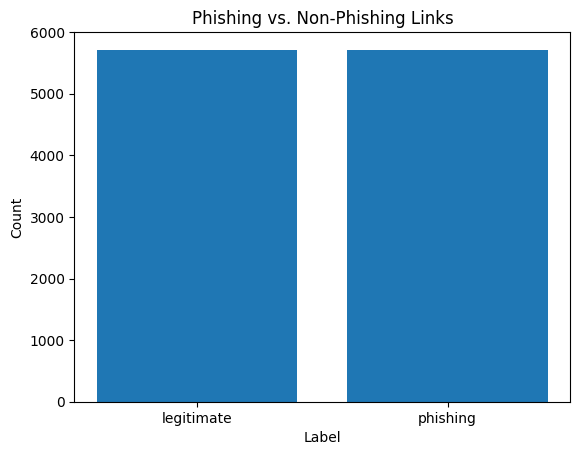

In [ ]:
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Phishing vs. Non-Phishing Links')
plt.show()

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
url,11430,11429,http://e710z0ear.du.r.appspot.com/c:/users/use...,2
status,11430,2,legitimate,5715


In [ ]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

# Feature Engineering Methods

In [ ]:
df=df.drop(["url"],axis=1)

In [ ]:
X = df.drop(["status"], axis = 1)
y = df["status"]
print(X.shape)
print(y.shape)

(11430, 87)
(11430,)


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Dimensionality Reduction techniques


### *PCA*

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_2D_pca = pca2.fit_transform(X)
print(f'PCA Features: Number of samples and attributes: {X_2D_pca.shape}')

PCA Features: Number of samples and attributes: (11430, 2)


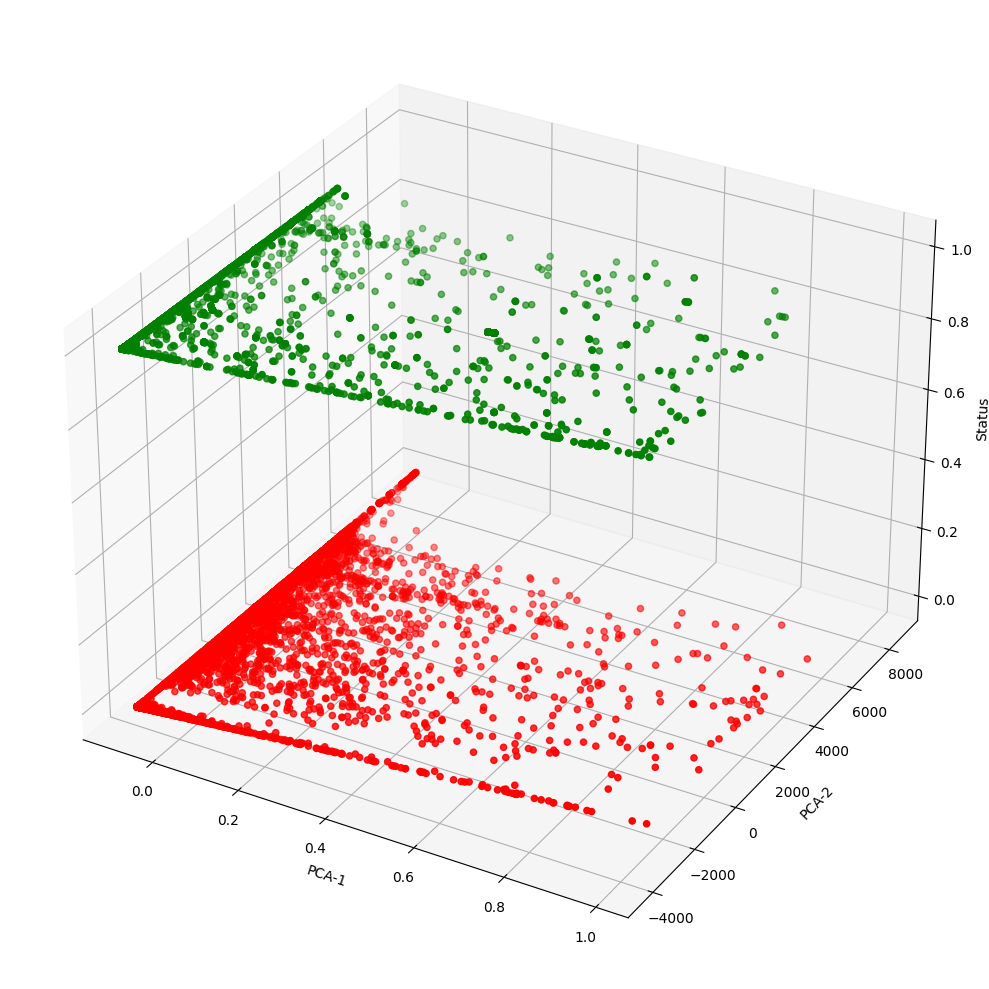

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_2D_pca[y==0,0], X_2D_pca[y==0,1], y[y==0], color="r");
ax.scatter(X_2D_pca[y==1,0], X_2D_pca[y==1,1], y[y==1], color="g");
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Status")
plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(X_2D_pca[y==0,0], X_2D_pca[y==0,1], color="b", alpha=0.35)
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
plt.show()

NameError: ignored

### *TSNE*

In [ ]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')

X_2D_tsne = tsne2.fit_transform(X)

print(f'tSNE Embedding: Number of samples and attributes: {X_2D_tsne.shape}')

tSNE Embedding: Number of samples and attributes: (11430, 2)


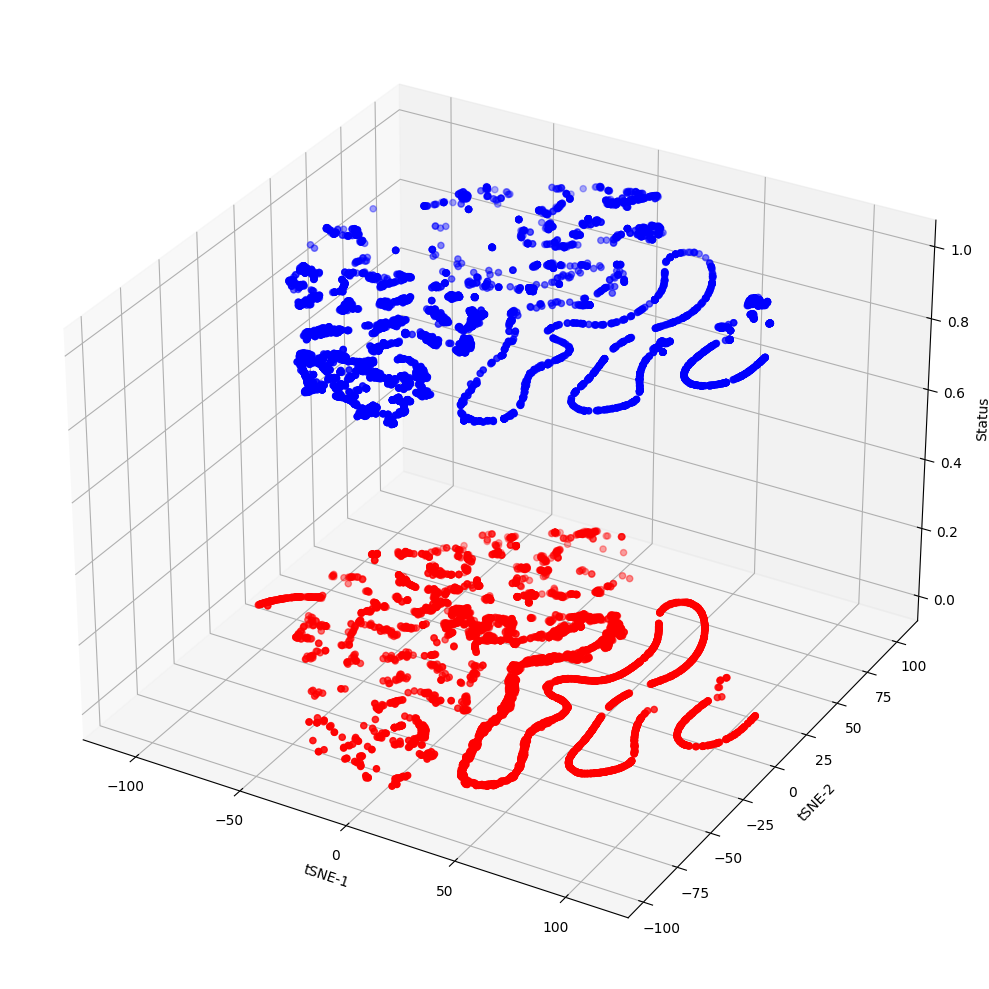

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_tsne[y==0,0], X_2D_tsne[y==0,1], y[y==0], color="r");
ax.scatter(X_2D_tsne[y==1,0], X_2D_tsne[y==1,1], y[y==1], color="b");

ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")
ax.set_zlabel("Status")

plt.tight_layout()
plt.show()

## Splitting the Data into Training and Testing data sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y, random_state=42)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


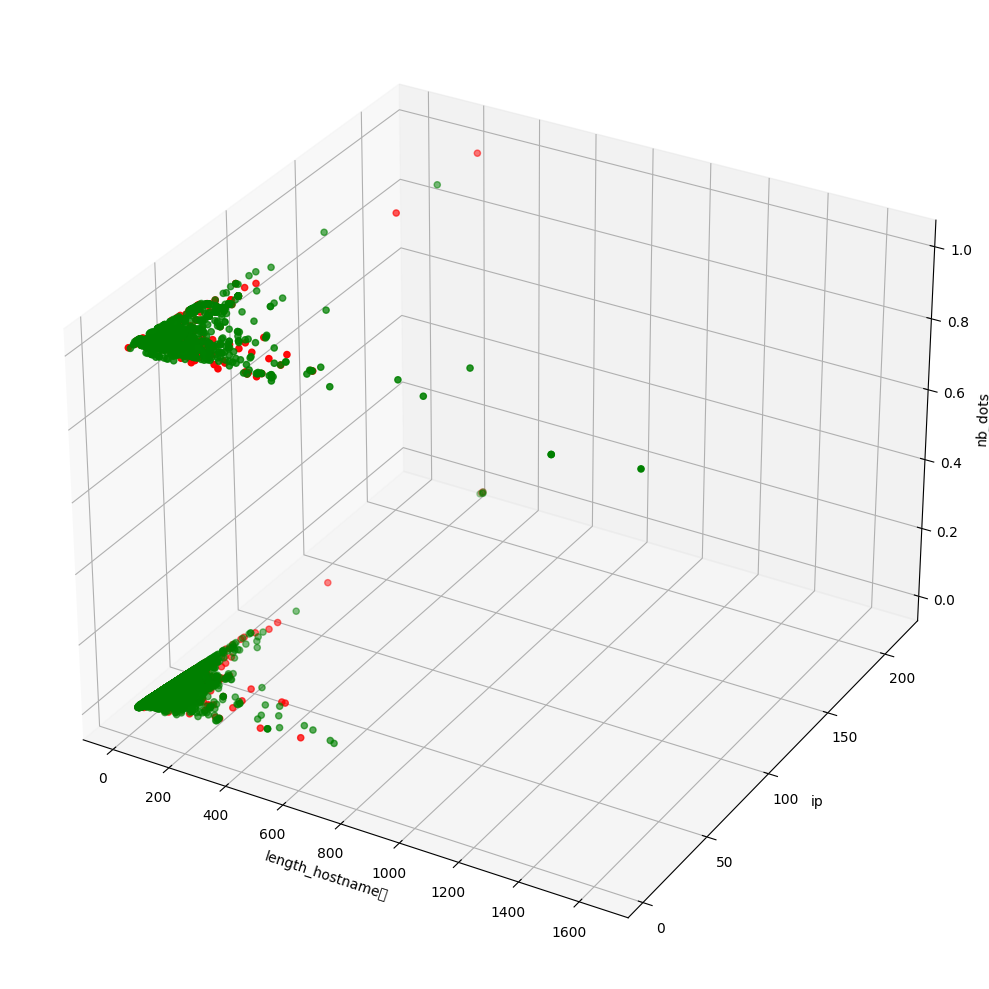

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(projection='3d')

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], X_train.iloc[:,2], color="g");
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], X_test.iloc[:,2], color="r");

ax.set_xlabel("length_hostname	")
ax.set_ylabel("ip")
ax.set_zlabel("nb_dots")
plt.tight_layout()
plt.show()

## Feature Scaling Methods

### *Standard Scaling*

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### *MinMax* Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_MMS = scaling.transform(X_train)
X_test_MMS = scaling.transform(X_test)

# Machine Learning Classification Techniques

## SoftMax Regression with different solvers



### *LBFGS Solver*

In [ ]:
# Without standard scaling
LR_clf = LogisticRegression(solver='lbfgs')
LR_clf.fit(X_train, y_train)
y_pred = LR_clf.predict(X_test)
score = LR_clf.score(X_test, y_test)
f1 = f1_score(y_test,y_pred)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")
print(f"F1 Score: {f1}")

Accuracy Score: 0.7777777777777778
F1 Score: 0.7819742489270387


In [ ]:
# With Standard Scaling
LR_clf_std = LogisticRegression(solver='lbfgs')
LR_clf_std.fit(X_train_std, y_train)
y_pred = LR_clf_std.predict(X_test_std)
score = LR_clf_std.score(X_test_std, y_test)
f1 = f1_score(y_test,y_pred)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score}")
print(f"F1 Score: {f1}")

Accuracy Score: 0.9361329833770778
F1 Score: 0.9359086918349429


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(LR_clf, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7845596055765787
0.007840880781187946


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for lbfgs classifier [1 1 1 ... 0 1 0]:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1143
           1       0.77      0.80      0.78      1143

    accuracy                           0.78      2286
   macro avg       0.78      0.78      0.78      2286
weighted avg       0.78      0.78      0.78      2286




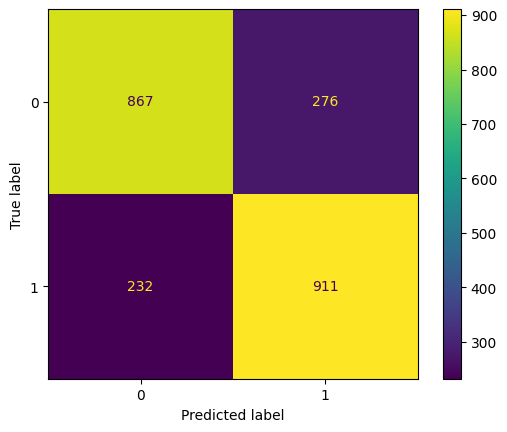

In [ ]:
print("Classification report for lbfgs classifier %s:\n%s\n"
% (y_pred, metrics.classification_report(y_test, y_pred)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

### *Newton CG solver*

In [ ]:
# Without standard scaling
softmax_new_cg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
softmax_new_cg.fit(X_train, y_train)
softmax_pred_new_cg=softmax_new_cg.predict(X_test)
score = softmax_new_cg.score(X_test, y_test)
f1=f1_score(y_test,softmax_pred_new_cg)
accuracy_score=metrics.accuracy_score(y_test, softmax_pred_new_cg)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy Score:	0.9339457567804025
F1 Score:	0.9337428696796839


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
# With standard scaling
softmax_new_cg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
softmax_new_cg.fit(X_train_std, y_train)
softmax_pred_new_cg_std=softmax_new_cg.predict(X_test_std)
score = softmax_new_cg.score(X_test_std, y_test)
f1=f1_score(y_test,softmax_pred_new_cg_std)
accuracy_score=metrics.accuracy_score(y_test, softmax_pred_new_cg_std)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9356955380577427
F1 Score:	0.9353846153846154


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(softmax_new_cg, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearch

0.9426956653861385
0.006728249789364023


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Classification report for Newton CG classifier LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1143
           1       0.94      0.93      0.93      1143

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286




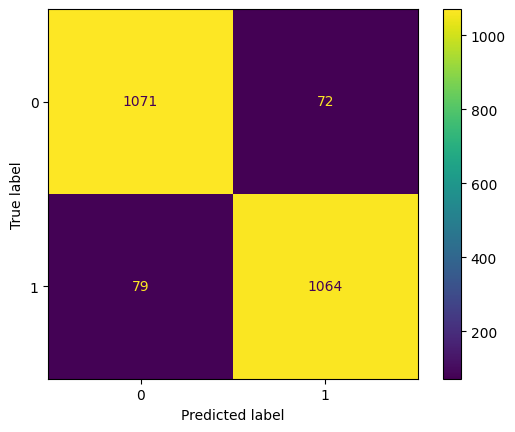

In [ ]:
print("Classification report for Newton CG classifier %s:\n%s\n"
% (softmax_new_cg, metrics.classification_report(y_test, softmax_pred_new_cg)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = softmax_pred_new_cg)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

## Support Vector Machines

### *Linear SVM*

In [ ]:
#With MinMax Scaler
linearSVM = svm.SVC(kernel = "linear")
linearSVM.fit(X_train_MMS, y_train)
predicted = linearSVM.predict(X_test_MMS)
accuracy_score=metrics.accuracy_score(y_test, predicted)
f1=f1_score(y_test,predicted)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9356955380577427
F1 Score:	0.9357236554438129


In [ ]:
#With Standard Scaling
linearSVM = svm.SVC(kernel = "linear")
linearSVM.fit(X_train_std, y_train)
predicted = linearSVM.predict(X_test_std)
accuracy_score=metrics.accuracy_score(y_test, predicted)
f1=f1_score(y_test,predicted)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9400699912510936
F1 Score:	0.9398859148749452


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(linearSVM, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1143
           1       0.94      0.94      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286




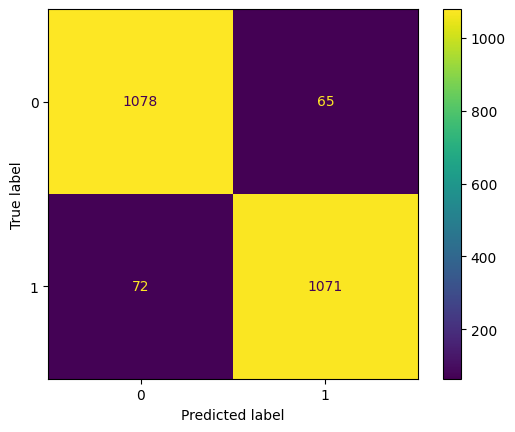

In [ ]:
print("Classification report for classifier %s:\n%s\n"
% (linearSVM, metrics.classification_report(y_test, predicted)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

### Kernel SVMs



#### *Radial Basis Function*


In [ ]:
#Without Standard Scaling
svc_clf_rbf = SVC(kernel='rbf',C=8.5, gamma=0.02, random_state=42)
svc_clf_rbf.fit(X_train, y_train)
svc_clf_rbf_pred=svc_clf_rbf.predict(X_test)
score_svc_rbf = svc_clf_rbf.score(X_test, y_test)
f1=f1_score(y_test,svc_clf_rbf_pred)
accuracy_score=metrics.accuracy_score(y_test,svc_clf_rbf_pred)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.7169728783902012
F1 Score:	0.6071645415907712


In [ ]:
#With Standard Scaling
svc_clf_rbf = SVC(kernel='rbf',C=8.5, gamma=0.02, random_state=42)
svc_clf_rbf.fit(X_train_std, y_train)
svc_clf_rbf_pred_std=svc_clf_rbf.predict(X_test_std)
score_svc_rbf = svc_clf_rbf.score(X_test_std, y_test)
f1=f1_score(y_test,svc_clf_rbf_pred_std)
accuracy_score=metrics.accuracy_score(y_test,svc_clf_rbf_pred_std)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")


Accuracy Score:	0.9650043744531933
F1 Score:	0.9651567944250872


In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(svc_clf_rbf, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

0.705380611184024
0.004953408222273073


Classification report for rbf classifier with Standard Scaling SVC(C=8.5, gamma=0.02, random_state=42):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1143
           1       0.96      0.97      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286




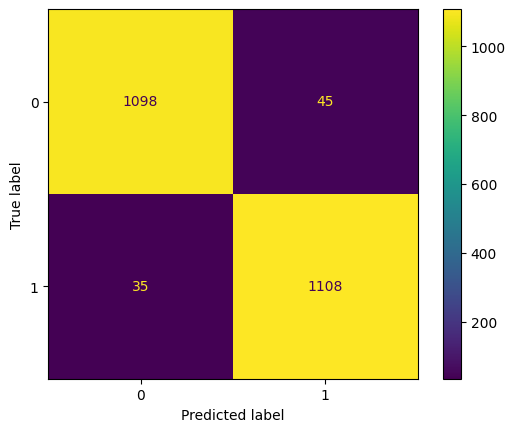

In [ ]:
print("Classification report for rbf classifier with Standard Scaling %s:\n%s\n"
% (svc_clf_rbf, metrics.classification_report(y_test, svc_clf_rbf_pred_std)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = svc_clf_rbf_pred_std)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

#### *Polynomial SVM*

In [ ]:
#Without Standard Scaling
svc_clf_poly = SVC(kernel='poly',C=9,degree=3, gamma=0.02, random_state=42)
svc_clf_poly.fit(X_train, y_train)
poly_predict=svc_clf_poly.predict(X_test)
score_svc_poly = svc_clf_poly.score(X_test, y_test)
f1=f1_score(y_test,poly_predict)
accuracy_score=metrics.accuracy_score(y_test, poly_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

In [ ]:
#With Standard Scaling
svc_clf_poly = SVC(kernel='poly',C=9,degree=3, gamma=0.02, random_state=42)
svc_clf_poly.fit(X_train_std, y_train)
poly_predict=svc_clf_poly.predict(X_test_std)
score_svc_poly = svc_clf_poly.score(X_test_std, y_test)
f1=f1_score(y_test,poly_predict)
accuracy_score=metrics.accuracy_score(y_test, poly_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9588801399825022
F1 Score:	0.9586994727592267


In [ ]:
#With MinMax Scaling
svc_clf_poly = SVC(kernel='poly',C=8.5,degree=3, gamma=0.02, random_state=42)
svc_clf_poly.fit(X_train_MMS, y_train)
poly_predict=svc_clf_poly.predict(X_test_MMS)
score_svc_poly = svc_clf_poly.score(X_test_MMS, y_test)
f1=f1_score(y_test,poly_predict)
accuracy_score=metrics.accuracy_score(y_test, poly_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Classification report for classifier SVC(C=9, gamma=0.02, kernel='poly', random_state=42):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1143
           1       0.96      0.95      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286




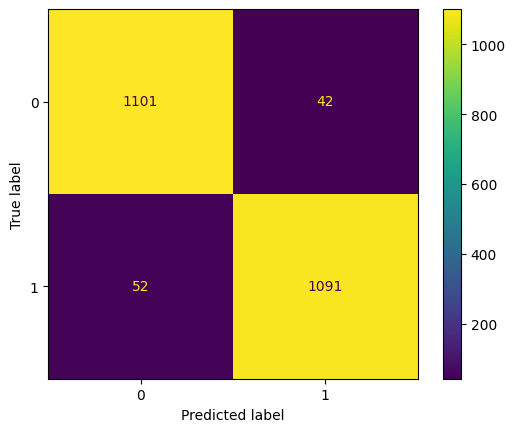

In [ ]:
print("Classification report for classifier %s:\n%s\n"
% (svc_clf_poly, metrics.classification_report(y_test, poly_predict)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = poly_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

## *Decision Trees*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dist = {'max_depth':[i for i in range(1,15)]}

In [ ]:
random_search = RandomizedSearchCV(estimator = tree_clf, param_distributions=hpt_param_dist,cv= 5)
random_search.fit(X_train_std, y_train)
random_search.best_params_

{'max_depth': 9}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 9, random_state = 42)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)
dtc_predict=tree_clf.predict(X_test)
f1=f1_score(y_test,dtc_predict)
accuracy_score=metrics.accuracy_score(y_test, dtc_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9400699912510936
F1 Score:	0.9400437636761488


Visualizing the Tree

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,out_file="clf_tree.dot",filled=True,rounded=True)

In [ ]:
from graphviz import Source
Source.from_file("clf_tree.dot")

Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(tree_clf, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

0.9374458786413401
0.0073684064683657785


## Ensemble Learning Techniques

### Bagging

#### *Random Forest Classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_hpt = RandomForestClassifier()
rf_clf_hpt.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dict = {'max_depth':[i for i in range(1,15)]}

In [ ]:
random_search = RandomizedSearchCV(estimator = rf_clf_hpt, param_distributions=hpt_param_dict,cv= 8)
random_search.fit(X_train_std, y_train)
random_search.best_params_

{'n_estimators': 70, 'max_depth': 11}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=13, random_state=42)
rf_clf.fit(X_train, y_train)
score_rf = rf_clf.score(X_test, y_test)
rf_predict=rf_clf.predict(X_test)
f1=f1_score(y_test,rf_predict)
accuracy_score=metrics.accuracy_score(y_test, rf_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9601924759405074
F1 Score:	0.9602793539938892


Classification report for Random Forest classifier RandomForestClassifier(max_depth=13, random_state=42):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1143
           1       0.96      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286




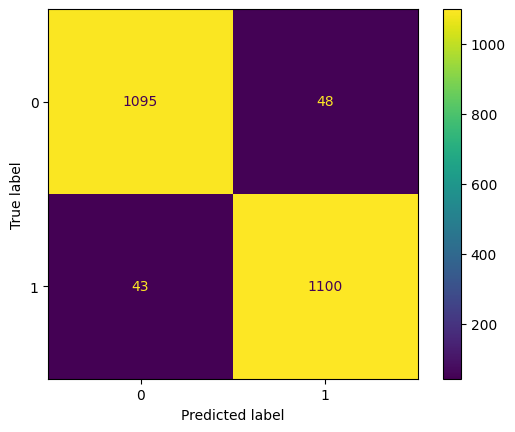

In [ ]:
print("Classification report for Random Forest classifier %s:\n%s\n"
% (rf_clf, metrics.classification_report(y_test, rf_predict)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = rf_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=None, random_state=42)
rf_clf.fit(X_train_std, y_train)
score_rf = rf_clf.score(X_test_std, y_test)
rf_predict=rf_clf.predict(X_test)
f1=f1_score(y_test,rf_predict)
accuracy_score=metrics.accuracy_score(y_test, rf_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.5918635170603674
F1 Score:	0.6949983654789147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(tree_clf, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

0.9374458786413401
0.0073684064683657785


### Boosting

#### *AdaBoost*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABC_hpt = GradientBoostingClassifier()
ABC_hpt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dist = {'n_estimators':[i for i in range(10,101,10)],
                  'max_depth':[i for i in range(1,15)]}

In [ ]:
random_search = RandomizedSearchCV(estimator = ABC_hpt, param_distributions=hpt_param_dist,cv= 5)
random_search.fit(X_train_std, y_train)
random_search.best_params_

{'n_estimators': 70, 'max_depth': 5}

In [ ]:
##Without Standard Scaling
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth = 7), n_estimators= 100)
ABC.fit(X_train, y_train)
print(ABC.score(X_test, y_test))
ABC_predict = ABC.predict(X_test)

Classification report for Random Forest classifier AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                   n_estimators=100):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1143
           1       0.96      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286




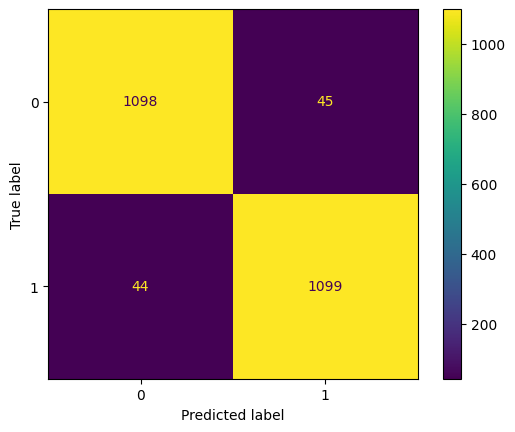

In [ ]:
print("Classification report for Ada Boost Classifier %s:\n%s\n"
% (ABC, metrics.classification_report(y_test, ABC_predict)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = ABC_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

In [ ]:
##With Standard Scaling
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ABC = AdaBoostRegressor(estimator= DecisionTreeRegressor(max_depth = 10), n_estimators= 100)
ABC.fit(X_train_std, y_train)
ABC.score(X_test_std, y_test)

0.9044455318794937

Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(ABC, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

0.9668639102808747
0.005821304767024926


#### *Gradient Boost*

Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_hpt = GradientBoostingClassifier()
GBC_hpt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dist = {'n_estimators':[i for i in range(10,101,10)],
                  'max_depth':[i for i in range(1,15)]}

In [ ]:
random_search = RandomizedSearchCV(estimator = GBC_hpt, param_distributions=hpt_param_dist,cv= 5)
random_search.fit(X_train_std, y_train)
random_search.best_params_

{'n_estimators': 100, 'max_depth': 6}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
GBC = GradientBoostingClassifier(loss="exponential", n_estimators= 100, max_depth=6)
GBC.fit(X_train ,y_train)
print(GBC.score(X_test, y_test))
GBC_pred = GBC.predict(X_test)

0.9601924759405074


Classification report for Gradient Boost Classifier GradientBoostingClassifier(loss='exponential', max_depth=6):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1143
           1       0.95      0.97      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286




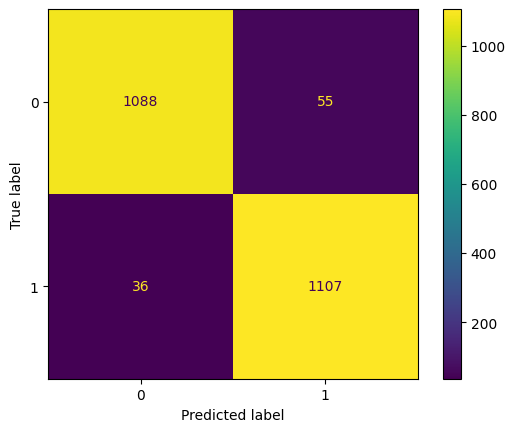

In [ ]:
print("Classification report for Gradient Boost Classifier %s:\n%s\n"
% (GBC, metrics.classification_report(y_test, GBC_pred)))
confMatrix = confusion_matrix(y_true = y_test, y_pred = GBC_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)
disp.plot()
plt.show()

In [ ]:
##With Standard Scaling
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
GBC = GradientBoostingClassifier(loss="exponential",n_estimators= 100, max_depth=8)
GBC.fit(X_train_std ,y_train)
GBC.score(X_test_std, y_test)

0.9645669291338582

Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(GBC, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

0.9635827711332017
0.0055708499780746795


### *Classification Boundaries for Gradient Boost Classifier*

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)
X_train_2D = pca2.transform(X_train)
X_test_2D = pca2.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
softmax_clf = LogisticRegression(solver='lbfgs')
softmax_clf.fit(X_train_2D, y_train)
score = softmax_clf.score(X_test_2D, y_test)
print(f'Classification accuray using raw data is {score}%')

Classification accuray using raw data is 0.6802274715660542%


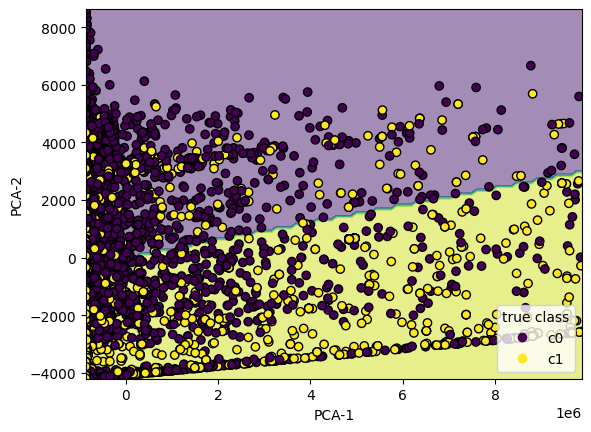

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
softmax_clf, X_train_2D, response_method="predict",
xlabel="PCA-1", ylabel="PCA-2", alpha=0.5)
scatter = plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=["c0", "c1", "c2"],
title="true class", loc='lower right')
plt.show()

# Feature Selection

## *Recursive Feature Elimination* (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=None, random_state=42)
rfe = RFE(estimator=rf_clf, n_features_to_select=25, step=1)

In [ ]:
rfe_Selector = rfe.fit(X, y)

In [ ]:
rfe_Selector.ranking_

array([ 1,  1, 14,  1,  3, 41,  7, 30, 63, 10, 20, 49, 22,  1, 55, 39, 50,
       40, 54, 26,  1, 31, 42, 33, 23,  1,  4, 58, 44, 37, 38, 43, 16, 29,
       36, 21, 53, 18, 56,  1,  2,  9,  1,  1,  1,  8,  1,  1,  6,  1,  1,
       17, 48, 45, 27, 32,  1,  1,  1, 57, 19, 59,  1, 60, 13, 34, 25,  1,
       61, 15, 12, 62, 47, 46,  1, 52, 51, 24,  5, 11, 35,  1,  1,  1, 28,
        1,  1])

In [ ]:
rfe_Selector.feature_names_in_

array(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon',
       'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www',
       'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyp

In [ ]:
X_RFE = rfe_Selector.transform(X)
print(X_RFE.shape)

(11430, 25)


In [ ]:
rfe_Selector.get_feature_names_out()

array(['length_url', 'length_hostname', 'nb_dots', 'nb_slash', 'nb_www',
       'ratio_digits_url', 'length_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_words_raw', 'longest_word_path',
       'avg_words_raw', 'avg_word_path', 'phish_hints', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'ratio_extRedirection', 'links_in_tags', 'safe_anchor',
       'domain_registration_length', 'domain_age', 'web_traffic',
       'google_index', 'page_rank'], dtype=object)

### *Splitting the RFE Data*

In [ ]:
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_RFE,y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
## Applying MinMax scaling on rfe data
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_rfe_train)
X_rfe_train_MMS = scaling.transform(X_rfe_train)
X_rfe_test_MMS = scaling.transform(X_rfe_test)

### RFE: Softmax Regression

#### *lbfgs solver*

In [ ]:
softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_clf.fit(X_rfe_train, y_rfe_train)
softmax_predict_lbfgs=softmax_clf.predict(X_rfe_test)
score = softmax_clf.score(X_rfe_test, y_rfe_test)
f1=f1_score(y_rfe_test,softmax_predict_lbfgs)
accuracy_score=metrics.accuracy_score(y_rfe_test, softmax_predict_lbfgs)
print(f"Accuracy Score: {accuracy_score}")
print(f"F1 Score: {f1}")

Accuracy Score: 0.7804024496937882
F1 Score: 0.7770870337477798


#### *Newton CG solver*

In [ ]:
softmax_new_cg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
softmax_new_cg.fit(X_rfe_train, y_rfe_train)
softmax_pred_new_cg=softmax_new_cg.predict(X_rfe_test)
score = softmax_new_cg.score(X_rfe_test, y_rfe_test)
f1=f1_score(y_rfe_test,softmax_pred_new_cg)
accuracy_score=metrics.accuracy_score(y_rfe_test, softmax_pred_new_cg)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy Score:	0.9230096237970253
F1 Score:	0.9237435008665512


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


### RFE: SVM

#### *Linear SVM*

In [ ]:
linearSVM = svm.SVC(kernel = "linear")
linearSVM.fit(X_rfe_train_MMS, y_rfe_train)
predicted = linearSVM.predict(X_rfe_test_MMS)
accuracy_score=metrics.accuracy_score(y_rfe_test, predicted)
f1=f1_score(y_test,predicted)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9221347331583553
F1 Score:	0.923076923076923


#### *RBF SVM*

In [ ]:
svc_clf_rbf = SVC(kernel='rbf',C=9.1, gamma=0.25, random_state=42)
svc_clf_rbf.fit(X_rfe_train_MMS, y_rfe_train)
svc_clf_rbf_pred=svc_clf_rbf.predict(X_rfe_test_MMS)
score_svc_rbf = svc_clf_rbf.score(X_rfe_test_MMS, y_rfe_test)
f1=f1_score(y_rfe_test,svc_clf_rbf_pred)
accuracy_score=metrics.accuracy_score(y_rfe_test,svc_clf_rbf_pred)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9492563429571304
F1 Score:	0.9492119089316987


#### *Poly SVM*

In [ ]:

svc_clf_poly = SVC(kernel='poly',C=8.5,degree=4, gamma=0.25, random_state=42)
svc_clf_poly.fit(X_rfe_train_MMS, y_rfe_train)
poly_predict=svc_clf_poly.predict(X_rfe_test_MMS)
score_svc_poly = svc_clf_poly.score(X_rfe_test_MMS, y_rfe_test)
f1=f1_score(y_rfe_test,poly_predict)
accuracy_score=metrics.accuracy_score(y_rfe_test, poly_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

Accuracy Score:	0.9426946631671042
F1 Score:	0.9428696031399912


### RFE: *Decision Trees*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 9, random_state = 42)
tree_clf.fit(X_rfe_train, y_rfe_train)
tree_clf.score(X_rfe_test, y_rfe_test)
dtc_predict=tree_clf.predict(X_rfe_test)
f1=f1_score(y_rfe_test,dtc_predict)
accuracy_score=metrics.accuracy_score(y_rfe_test, dtc_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")

### RFE: Bagging

#### *Random Forest Classifier*

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=25, n_jobs=-1, random_state=42)
rf_clf.fit(X_rfe_train, y_rfe_train)
score_rf = rf_clf.score(X_rfe_test, y_rfe_test)
rf_predict=rf_clf.predict(X_rfe_test)
f1=f1_score(y_rfe_test,rf_predict)
accuracy_score=metrics.accuracy_score(y_rfe_test, rf_predict)
print(f"Accuracy Score:\t{accuracy_score}")
print(f"F1 Score:\t{f1}")


### RFE: Boosting

#### *AdaBoost*

In [ ]:
##Without Standard Scaling
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth = 9), n_estimators= 100)
ABC.fit(X_rfe_train, y_rfe_train)
ABC.score(X_rfe_test, y_rfe_test)

0.9641294838145232

#### *Gradient Boost*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
GBC = GradientBoostingClassifier(loss="exponential", n_estimators= 100, max_depth=8)
GBC.fit(X_rfe_train ,y_rfe_train)
GBC.score(X_rfe_test, y_rfe_test)

0.9654418197725284